In [2]:
# (from Ch 9 in Packt Machine Learning Algorithms (G. Bonaccorso))
#MID converted to Jupyter, added KNN classifier for exersize & comparison as K-means was much inferior to KNN on the first dataset.  

In [3]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
#MID ADD
from sklearn.neighbors import KNeighborsClassifier


# For reproducibility
np.random.seed(1000)

nb_samples = 1000

In [4]:
def show_dataset(X):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

In [5]:
def show_clustered_dataset(X, km):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        c = km.predict(X[i].reshape(1, -1))
        if c == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

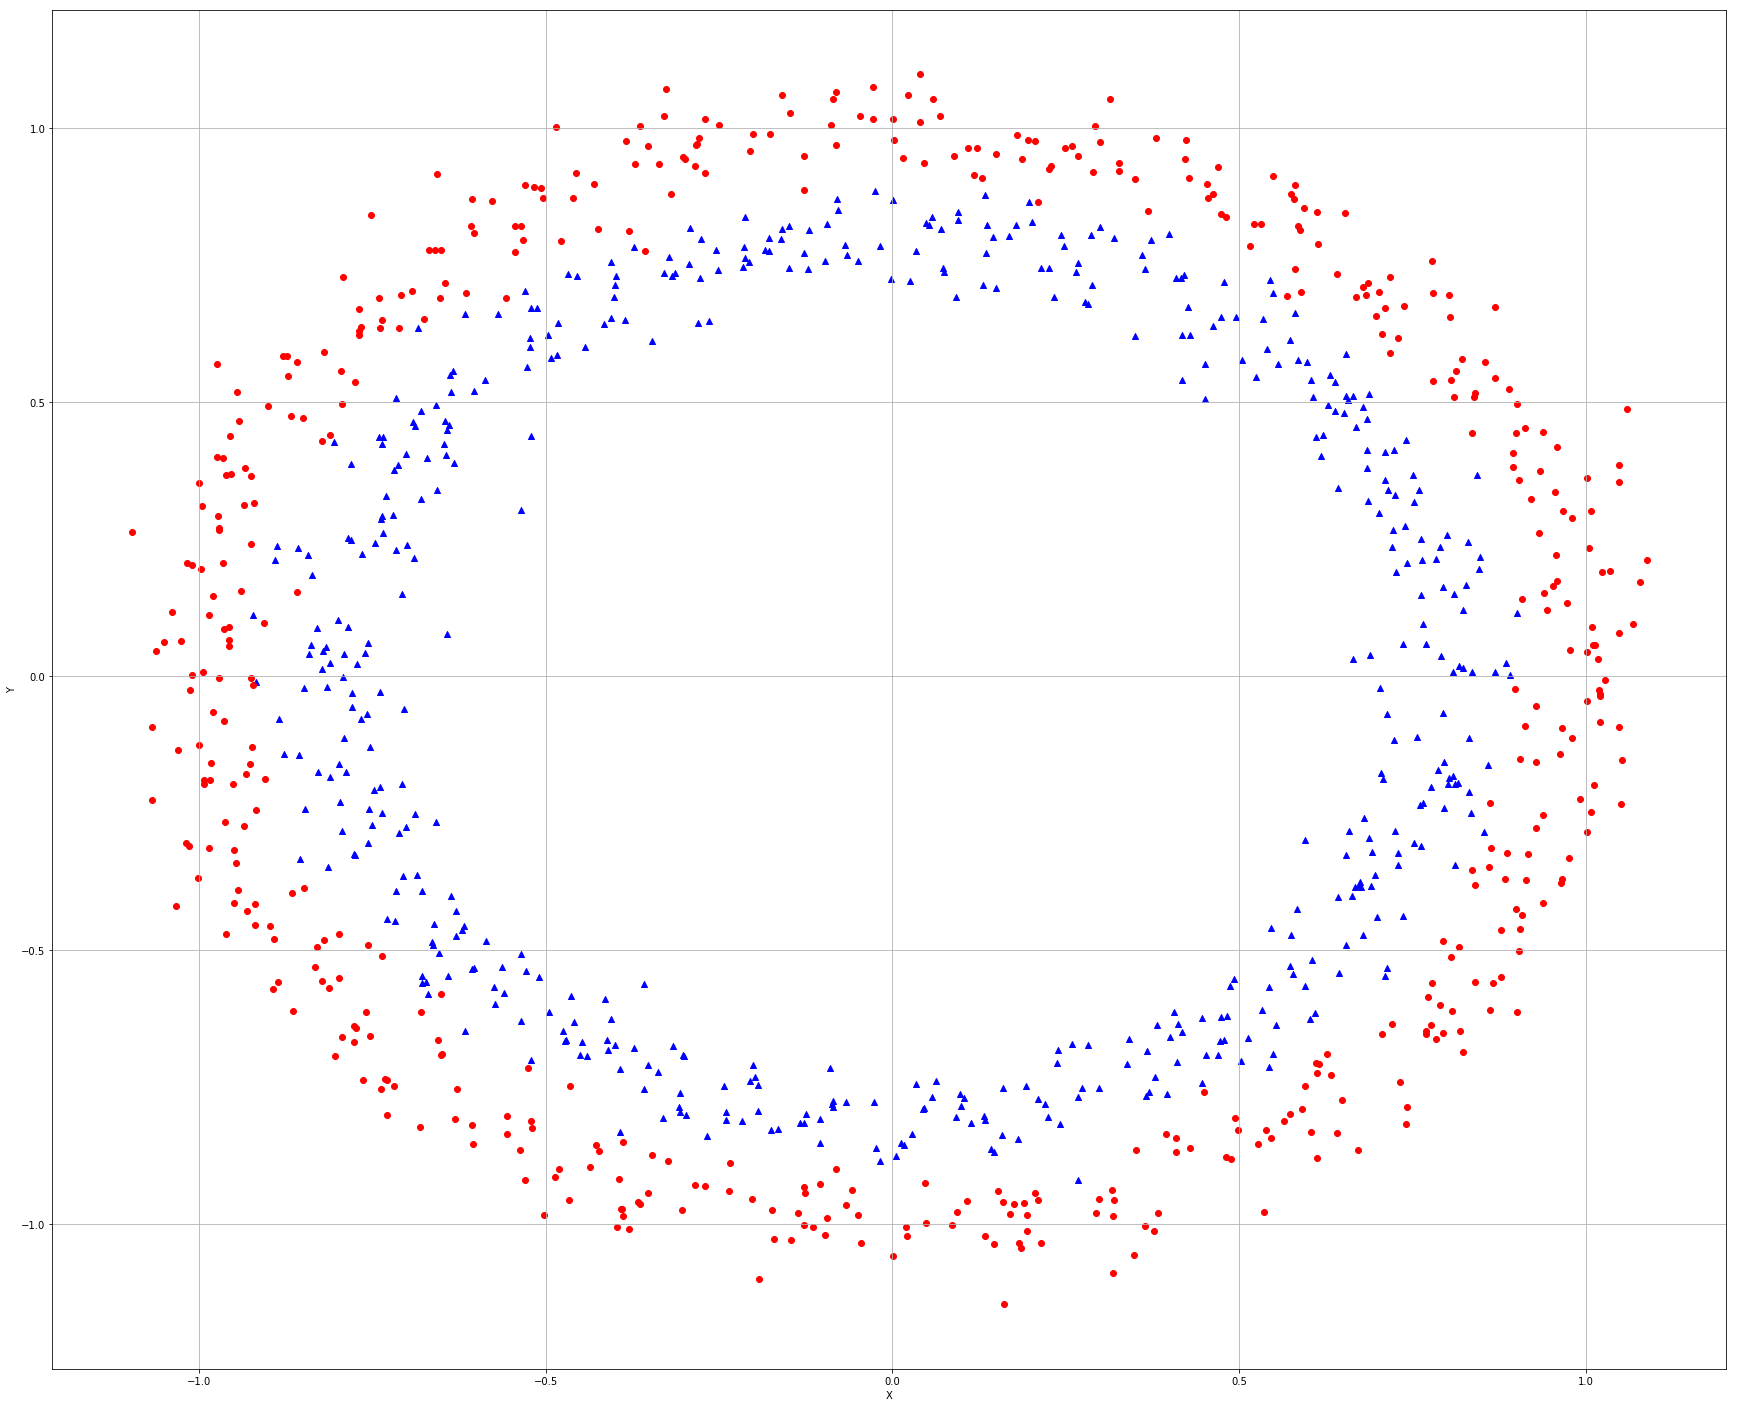

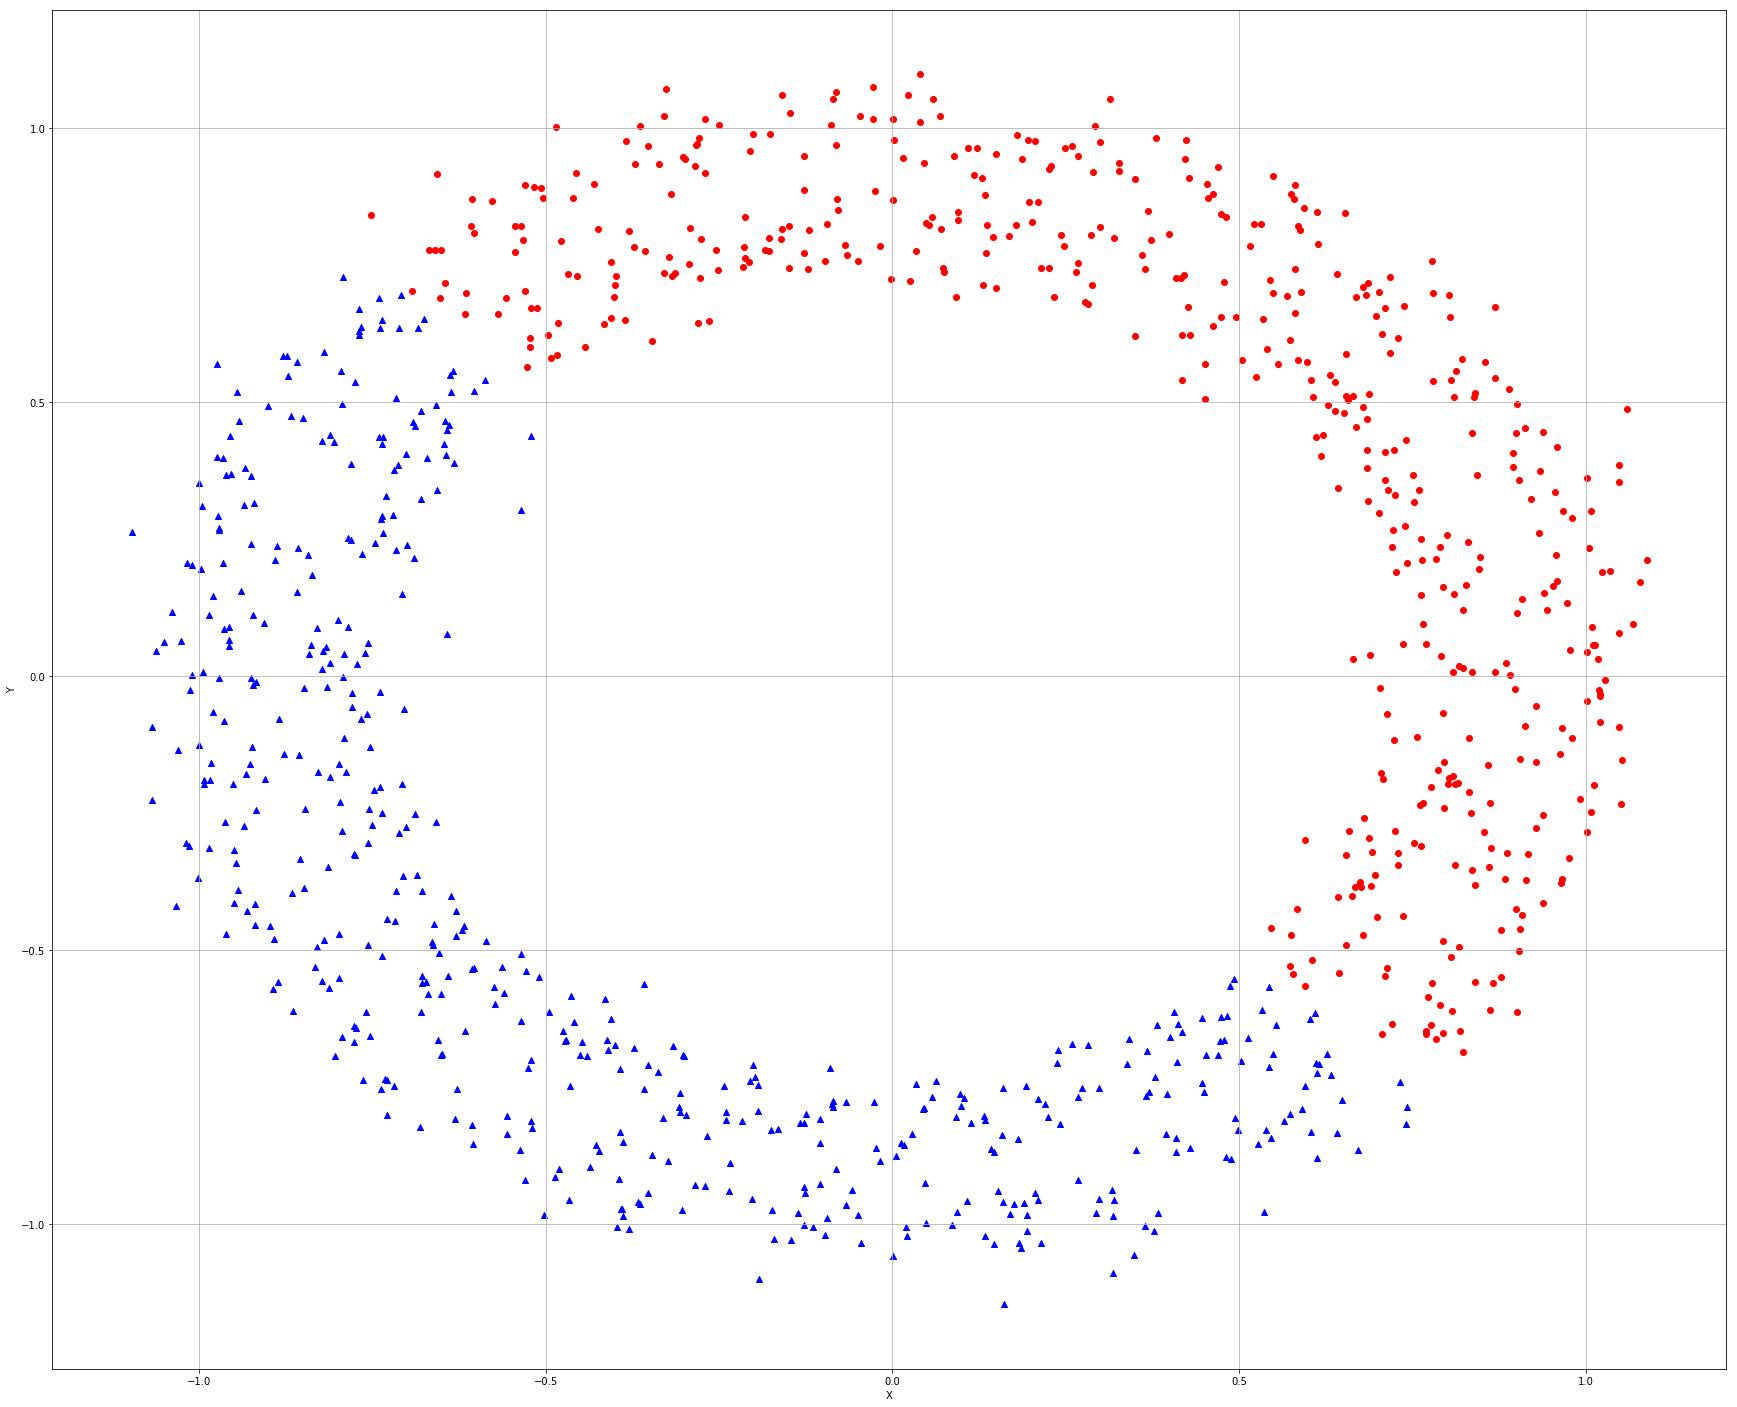

In [6]:
# Create dataset
X, Y = make_circles(n_samples=nb_samples, noise=0.05)

# Show dataset
show_dataset(X)

# Create and train K-Means
km = KMeans(n_clusters=2)
km.fit(X)

# Show clustered dataset
show_clustered_dataset(X, km)

In [7]:
#MID add. Display the X coordinates
X


array([[ 0.81207946, -0.34536956],
       [-0.73581257,  0.42350683],
       [-0.96039339,  0.36688102],
       ...,
       [ 0.58804516,  0.814621  ],
       [ 0.22595593,  0.74494371],
       [ 0.63299676, -0.72750127]])

In [8]:
#MID add. Actual classification 
Y

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [15]:
#MID add.  Use KNN.  KNN is much superior for the classification of the circles.
#use 70% of data for training. Note that if the data would have had order to it, 
#then the test_train_split should be used as follows:
#X_train, X_test, Y_train,, Y_test, = train_test_split(X, Y, test_size=0.3)

#Since the above output for the Y values looks random, this wasn't necessary in this case, 
#so a manual split was done using index values

train_end=int(0.7*nb_samples)
print("end of training index",train_end)
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1).fit(X[:train_end],Y[:train_end])
print("# training samples",train_end)
print("# test samples",len(X[train_end:]))

end of training index 700
# training samples 700
# test samples 300


In [12]:
#MID add. Display List of the Predicted classification values.  
knn.predict(X[train_end+1:])


array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtyp

In [20]:
#MID add. Calculate accuracy of test set (show training set accuracy for illustration purposes only)
#X_test=X[train_end:]
#Y_test=Y[train_end:]
print("prediction accuracy on train set (not very relevant; should be higher than test) =",sum(knn.predict(X[:train_end])==Y[:train_end])/len(X[:train_end]))
print("prediction accuracy on test set =",sum(knn.predict(X[train_end:])==Y[train_end:])/len(X[train_end:]))


prediction accuracy on train set (not very relevant; should be higher than test) = 0.9814285714285714
prediction accuracy on test set = 0.9566666666666667


In [30]:
#MID add
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
Y

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,